$$c = \sqrt{a^2 + b^2}$$

In [49]:
import numpy as np
import pandas as pd
import pandapower as pp

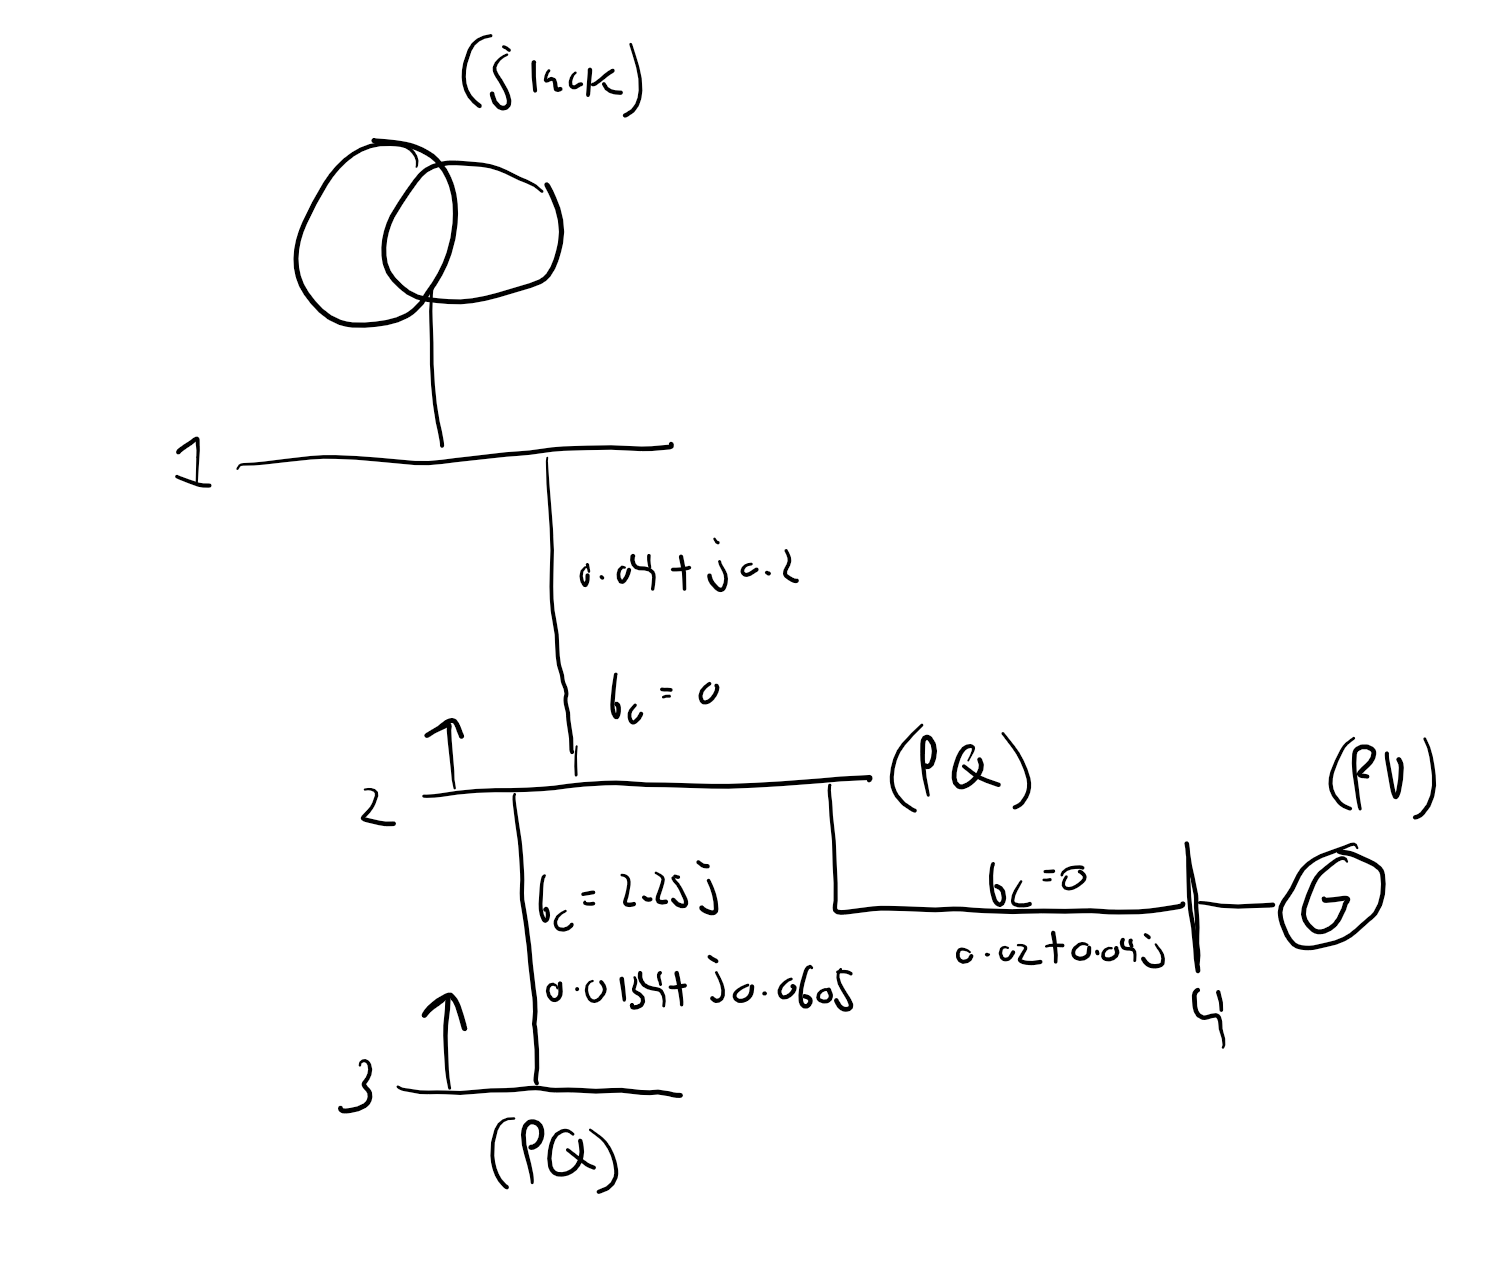

Get impedances and calcuate the Y-bus from the diagram

In [44]:
impedances = {
    (1, 2): 0.04 + 0.2j,
    (2, 3): 0.0134 + 0.0605j,
    (2, 4): 0.02 + 0.04j
}

charging_susceptances = {
    (1, 2): 0.0,
    (2, 3): 2.25j,
    (2, 4): 0.0
}

num_buses = 4

In [45]:
def calculate_y_bus_updated(impedances, charging_susceptances, num_buses):
    """
    Calculate the Y-bus matrix for a given power system.

    :param impedances: Dictionary of impedances between buses. 
                       Keys are tuples of bus pairs (i, j), and values are the impedances (complex numbers).
    :param charging_susceptances: Dictionary of charging susceptances between buses.
                                  Keys are tuples of bus pairs (i, j), and values are the susceptances (complex numbers).
    :param num_buses: Number of buses in the system.
    :return: Y-bus matrix as a numpy array.
    """

    # Initialize Y-bus matrix with zeros
    Y_bus = np.zeros((num_buses, num_buses), dtype=complex)

    # Fill the off-diagonal elements
    for (i, j), Z in impedances.items():
        Y_ij = -1 / Z
        Y_bus[i-1, j-1] = Y_ij
        Y_bus[j-1, i-1] = Y_ij

    # Fill the diagonal elements
    for i in range(1, num_buses+1):
        Y_ii = 0
        for j in range(1, num_buses+1):
            if i != j and (i, j) in impedances:
                Y_ii -= Y_bus[i-1, j-1]
        for (k, l), Bc in charging_susceptances.items():
            if i == k or i == l:
                Y_ii += Bc
        Y_bus[i-1, i-1] = Y_ii

    return Y_bus

In [47]:
# Calculate the Y-bus matrix using the function
Y_bus_matrix = calculate_y_bus(impedances, charging_susceptances, num_buses)
Y_bus_matrix

array([[  0.96153846 -4.80769231j,  -0.96153846 +4.80769231j,
          0.         +0.j        ,   0.         +0.j        ],
       [ -0.96153846 +4.80769231j,  13.489756  -35.75598793j,
         -3.489756  +15.75598793j, -10.        +20.j        ],
       [  0.         +0.j        ,  -3.489756  +15.75598793j,
          0.         +0.j        ,   0.         +0.j        ],
       [  0.         +0.j        , -10.        +20.j        ,
          0.         +0.j        ,   0.         +0.j        ]])

In [53]:
### TEST
impedances_2 = {
    (1, 3): 5 + 0.06j,
    (1, 2): 0.059 + 0.0235j,
    (3, 2): 0.0035 + 0.0183j,
}

charging_susceptances_2 = {
    (1, 2): 0,
    (1, 3): 0,
    (3, 2): 0
}

num_buses_2 = 3
# Calculate the Y-bus matrix using the function
Y_bus_matrix_2 = calculate_y_bus(impedances_2, charging_susceptances_2, num_buses_2)
Y_bus_matrix_2
# Convert Y_bus to a DataFrame for better display
Y_bus_df = pd.DataFrame(Y_bus_matrix_2, index=[1, 2, 3], columns=[1, 2, 3])
Y_bus_df

,1,2,3
1,19.628401-20.826567j,-14.628401+ 5.826567j,-5.000000+15.000000j
2,-14.628401+ 5.826567j,0.000000+ 0.000000j,-10.082388+52.716483j
3,-5.000000+15.000000j,-10.082388+52.716483j,10.082388-52.716483j
